In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')


In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv')
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Attribute Information

Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict. 

Name / Data Type / Measurement Unit / Description
-----------------------------
Sex / nominal / -- / M, F, and I (infant)
Length / continuous / mm / Longest shell measurement
Diameter / continuous / mm / perpendicular to length
Height / continuous / mm / with meat in shell
Whole weight / continuous / grams / whole abalone
Shucked weight / continuous / grams / weight of meat
Viscera weight / continuous / grams / gut weight (after bleeding)
Shell weight / continuous / grams / after being dried
Rings / integer / -- / +1.5 gives the age in years. 

You have to predict the rings of each abalone which will lead us to the age of that abalone.

we need to apply regression model because the target data is of continous form

In [6]:
data.shape

(4177, 9)

We have 4177 rows and 9 columns in our dataset

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


Sex is of Object data type and Rings is of Integer data type, Rest all coulumns are of float value

In [8]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


We can see that minimum value of Height is 0 that is not feasible, hence needs to be checked,

Also, lookings at the diffrence in range of data it seems that there are outliers in our dataset, we will check that further

In [9]:
data['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

We can see that the data is quite evenly distributed between 3 different classes i.e., Male, Female and Infant

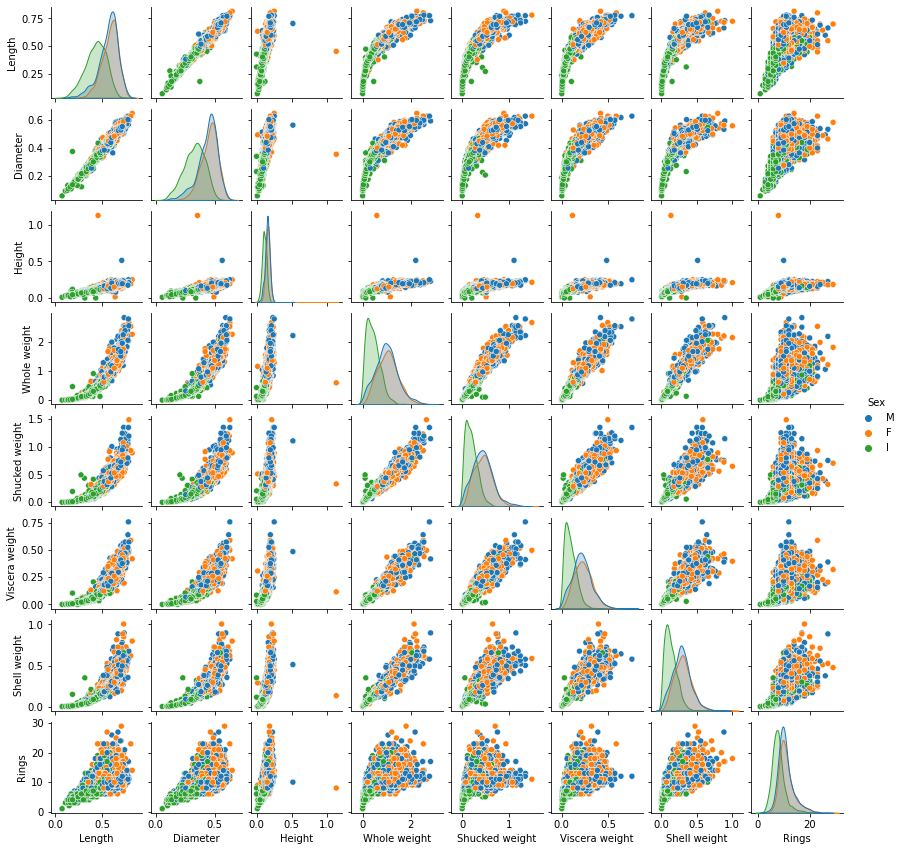

In [10]:
sns.pairplot(data, hue = 'Sex', height=1.5)

We can infer that Shell weight, shucked weight, viscera weight and whole weight are highly correlated and showing multicollinearirity. Similarly Length and Diameter is showing multicollinearity

Also, we have observed that minimum value of predictor Height is 0 that doesn't seems practical

In [11]:
data.loc[data['Height'] == 0]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6


We can see that there are two rows in our dataset having 0 height
Let's remove these two entries

In [12]:
data = data.drop(data.index [ [ 1257,3996 ] ])

In [13]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4175.000000,4175.00000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000
mean,0.524065,0.40794,0.139583,0.829005,0.359476,0.180653,0.238834,9.935090
std,0.120069,0.09922,0.041725,0.490349,0.221954,0.109605,0.139212,3.224227
min,0.075000,0.05500,0.010000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.35000,0.115000,0.442250,0.186250,0.093500,0.130000,8.000000
50%,0.545000,0.42500,0.140000,0.800000,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.48000,0.165000,1.153500,0.502000,0.253000,0.328750,11.000000
max,0.815000,0.65000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


Two of our rows are removed
Now let's check the correlation using heatmap

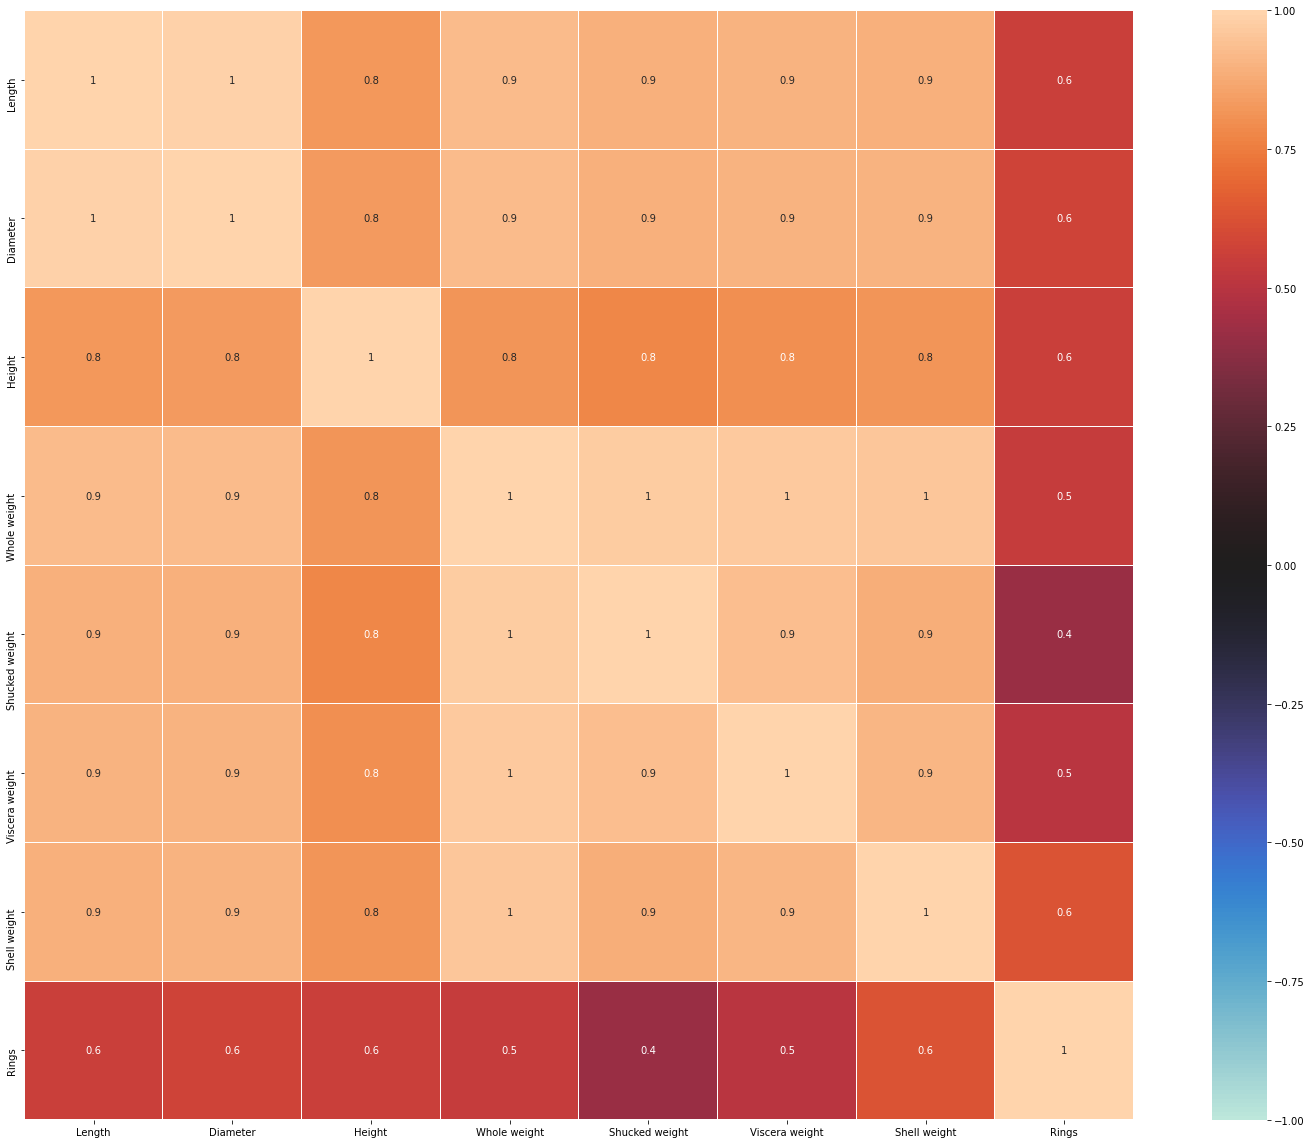

In [14]:
df_corr = data.corr().abs()
plt.figure(figsize = (22,16))
sns.heatmap(df_corr, vmin = -1, vmax = 1, annot = True, square = True, center = 0, fmt = '.1g', linewidths = .1)
plt.tight_layout()

From above, we can infer that Rings that determines the age of abalone is least linear to Shucked weight

There is high multicollinearity between features.


In [15]:
rel = data[['Length','Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']]

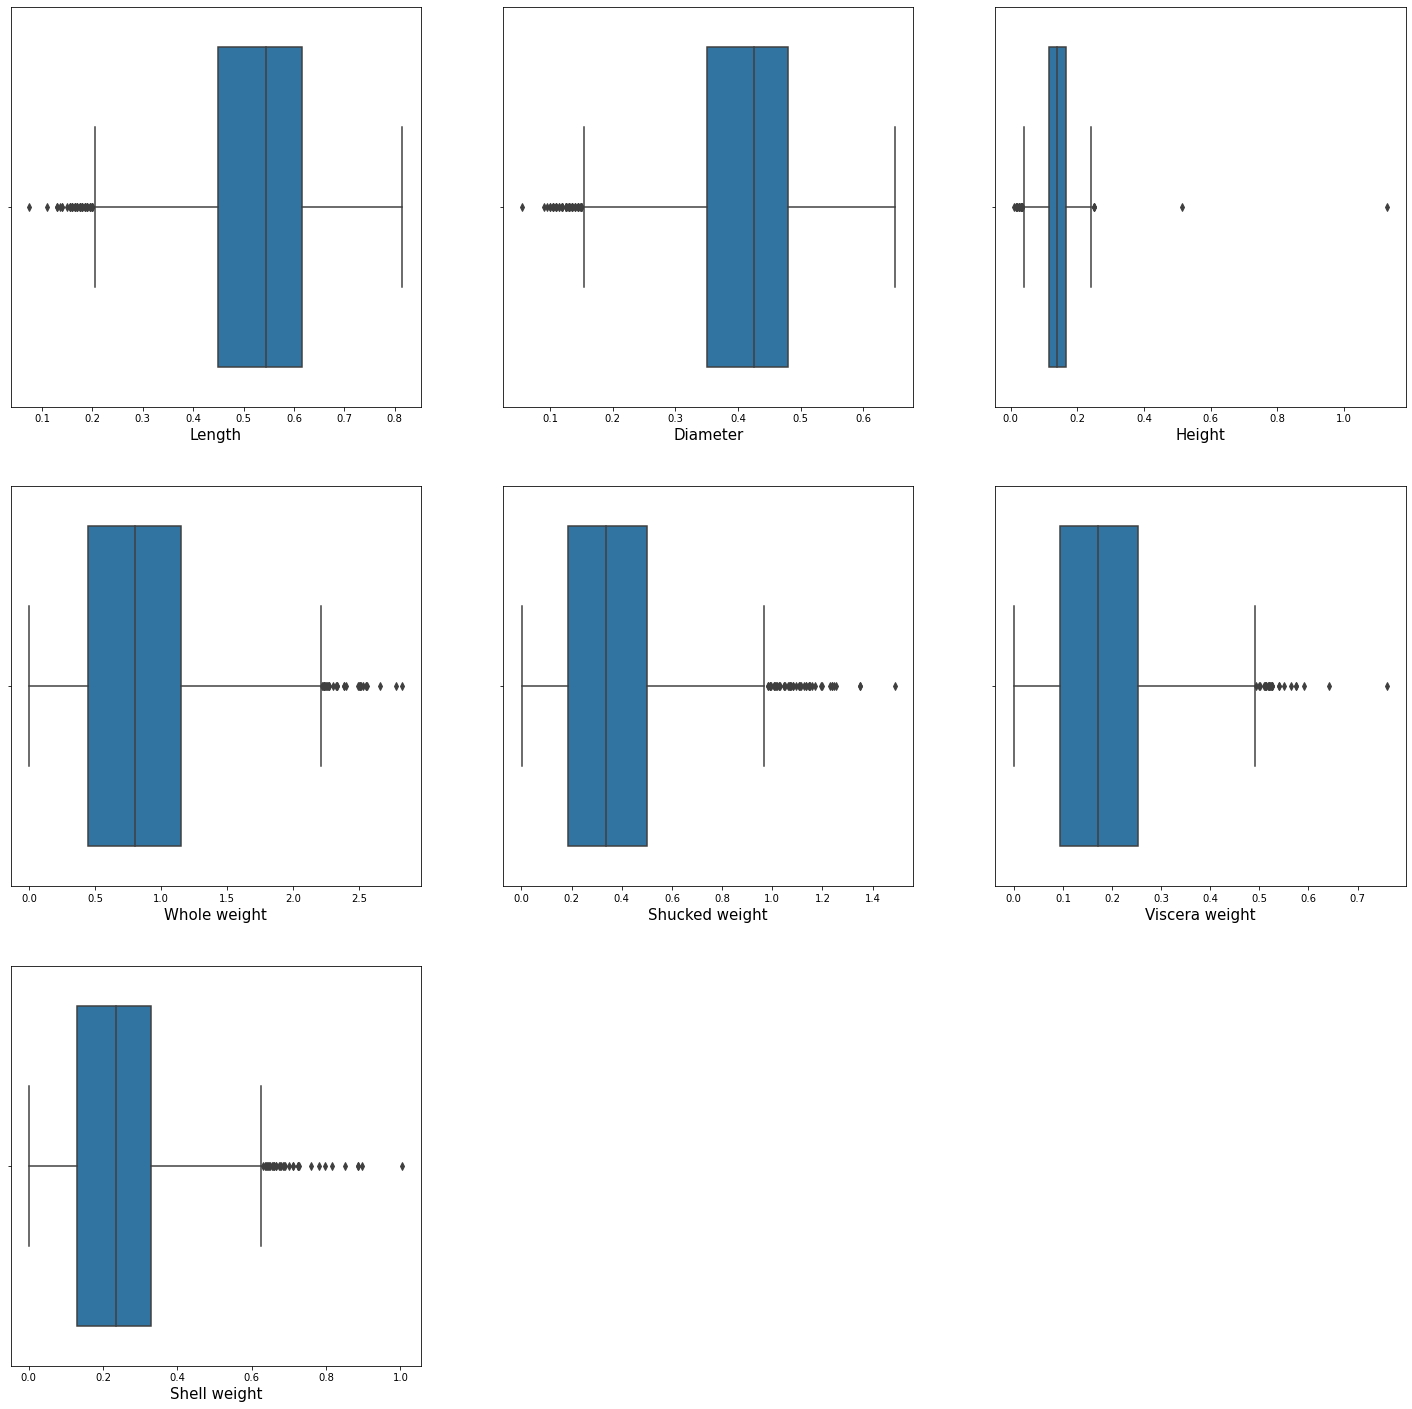

In [16]:
plt.figure(figsize = (25,25))
plotnumber = 1
for column in rel:
    if plotnumber <= 12:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(rel[column])
        plt.xlabel(column, fontsize = 15)
    plotnumber+=1
plt.show()

There are outliers present in almost all the features, Let us handle this with zscore method

In [17]:
# outliers removal
from scipy.stats import zscore

z_score = zscore(rel)
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 3).all(axis = 1)

data = data[filtering_entry]

data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000
mean,0.522090,0.406308,0.138530,0.808404,0.350172,0.176579,0.233142,9.901567
std,0.115709,0.095848,0.037001,0.457321,0.205827,0.103336,0.129482,3.164617
min,0.165000,0.115000,0.015000,0.014500,0.005500,0.000500,0.005000,3.000000
25%,0.450000,0.350000,0.115000,0.441000,0.185375,0.092875,0.130000,8.000000
50%,0.540000,0.420000,0.140000,0.790750,0.332000,0.168500,0.230000,9.000000
75%,0.610000,0.480000,0.165000,1.134750,0.494000,0.247000,0.320500,11.000000
max,0.760000,0.605000,0.250000,2.238500,1.017000,0.492500,0.655000,29.000000


In [18]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Our data values in Sex coulum are of categorical type, let's encode it using LabelEncoder

In [20]:
!pip install category_encoders
from sklearn.preprocessing import LabelEncoder

In [21]:
lab_enc = LabelEncoder()
data['Sex'] = lab_enc.fit_transform(data['Sex'])

In [22]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [23]:
data['Sex'].value_counts()

2    1482
1    1325
0    1277
Name: Sex, dtype: int64

Where Male=2, Infant=1, Female=0

Let's divide our data in features and lablel columns

In [24]:
x = data.drop(columns = ['Rings'], axis = 1)
y = data['Rings']

# Scaling

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)

# Train Test Split

In [26]:
#Split data into train and tests. Model will be built on training data and tested on test data.
x_train,x_test,y_train,y_test = train_test_split(x_scaler,y,test_size = 0.25, random_state=1)


# # Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
regression = LinearRegression()
regression.fit(x_train,y_train) #Training our model

LinearRegression()

In [31]:
regression.score(x_train, y_train)

0.5200904531103885

In [61]:
#52.009%

In [32]:
lr_pred = regression.predict(x_test)

In [34]:
regression.score(x_test, y_test)

0.5359446982637621

In [62]:
#53.59%

In [63]:
metrics.r2_score(y_test, lr_pred) #R2 Score

0.5359446982637621

# Lasso and Ridge Regression model building

## Lasso regression model

In [36]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV
lasscv = LassoCV(alphas = None, normalize = True)
lasscv.fit(x_train,y_train)

LassoCV(normalize=True)

In [37]:
alpha = lasscv.alpha_ # finding alpha 
alpha

3.535449798295832e-05

In [64]:
lasso_reg = Lasso(alpha)  # Training our model with alpha
lasso_reg.fit(x_train, y_train)

Lasso(alpha=3.535449798295832e-05)

In [39]:
lasso_reg.score(x_train, y_train)

0.5200904128569303

In [65]:
#52.009%

In [40]:
lassor_pred = lasso_reg.predict(x_test)

In [66]:
lasso_reg.score(x_test, y_test)

0.5359375547814632

In [67]:
#53.59%

In [68]:
metrics.r2_score(y_test, lassor_pred) #R2_Score

0.5359375547814632

# Ridge Regression

In [46]:
ridgecv = RidgeCV(alphas = np.arange(0.001, 0.1, 0.001), normalize = True)

In [47]:
ridgecv.fit(x_train, y_train) # Training for alpha

RidgeCV(alphas=array([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009,
       0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018,
       0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027,
       0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035, 0.036,
       0.037, 0.038, 0.039, 0.04 , 0.041, 0.042, 0.043, 0.044, 0.045,
       0.046, 0.047, 0.048, 0.049, 0.05 , 0.051, 0.052, 0.053, 0.054,
       0.055, 0.056, 0.057, 0.058, 0.059, 0.06 , 0.061, 0.062, 0.063,
       0.064, 0.065, 0.066, 0.067, 0.068, 0.069, 0.07 , 0.071, 0.072,
       0.073, 0.074, 0.075, 0.076, 0.077, 0.078, 0.079, 0.08 , 0.081,
       0.082, 0.083, 0.084, 0.085, 0.086, 0.087, 0.088, 0.089, 0.09 ,
       0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098, 0.099]),
        normalize=True)

In [48]:
ridgecv.alpha_ # finding alpha

0.001

In [69]:
ridge_model  = Ridge(alpha = ridgecv.alpha_)
ridge_model.fit(x_train, y_train) # training our model with alpha

Ridge(alpha=0.001)

In [70]:
ridge_model.score(x_train, y_train)

0.5200904530741638

In [ ]:
#52.009%

In [52]:
ridge_pred = ridge_model.predict(x_test)

In [71]:
ridge_model.score(x_test, y_test)

0.5359442822859135

In [ ]:
#53.59%

In [54]:
metrics.r2_score(y_test, ridge_pred)

0.5359442822859135

# Ada-Boost regressor

In [55]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()

In [56]:
ada.fit(x_train, y_train) # Model Training

AdaBoostRegressor()

In [72]:
ada.score(x_train, y_train)

0.2186210342340701

In [ ]:
#21.8%

In [58]:
ada_pred = ada.predict(x_test) #prediction

In [73]:
ada.score(x_test, y_test)

0.19791870350397145

In [ ]:
#19.79%

In [60]:
metrics.r2_score(y_test, ada_pred)

0.19791870350397145

We can see that in above 4 diffrent models, Linear regression, lasso and Ridge are giving exact same score, and as the age can be calculated with the number of rings in abalone, more than 50% score is not bad for this dataset.

Let's us save one of our model

In [74]:
import pickle
filename = "Abalone_age"
pickle.dump(ridge_model, open(filename,'wb'))